In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
%%time
X_train = pd.read_csv("./Dataset/CompressedData.csv")

CPU times: user 37 ms, sys: 12.3 ms, total: 49.3 ms
Wall time: 48.1 ms


In [13]:
X_train.head()

,Asset_ID,new_date,Count,Open,High,Low,Close,Volume,VWAP,Target
0,0,2018-01-01,12.935323,8.271426,8.281705,8.259240,8.269135,464.922075,8.269348,0.000148
1,0,2018-01-02,20.910552,8.526834,8.540125,8.510583,8.525199,882.242788,8.524557,0.000393
2,0,2018-01-03,17.171209,8.706437,8.718355,8.692207,8.704740,662.049371,8.704213,0.000549
3,0,2018-01-04,20.150885,9.032841,9.052548,9.014046,9.032460,742.490331,9.032244,0.000006
4,0,2018-01-05,31.315202,11.874380,11.924612,11.813422,11.875316,1928.156932,11.870353,0.005618


In [14]:
X_train.isnull().sum()

Asset_ID    0
new_date    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        5
Target      0
dtype: int64

In [18]:
X_train['yyyy'] = pd.to_datetime(X_train['new_date']).dt.year
X_train['mm'] = pd.to_datetime(X_train['new_date']).dt.month

In [19]:
X_train.head()

,Asset_ID,new_date,Count,Open,High,Low,Close,Volume,VWAP,Target,yyyy,mm
0,0,2018-01-01,12.935323,8.271426,8.281705,8.259240,8.269135,464.922075,8.269348,0.000148,2018,1
1,0,2018-01-02,20.910552,8.526834,8.540125,8.510583,8.525199,882.242788,8.524557,0.000393,2018,1
2,0,2018-01-03,17.171209,8.706437,8.718355,8.692207,8.704740,662.049371,8.704213,0.000549,2018,1
3,0,2018-01-04,20.150885,9.032841,9.052548,9.014046,9.032460,742.490331,9.032244,0.000006,2018,1
4,0,2018-01-05,31.315202,11.874380,11.924612,11.813422,11.875316,1928.156932,11.870353,0.005618,2018,1


In [20]:
years = X_train['yyyy'].unique()

In [21]:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

ValueError: Unrecognized character a in format string

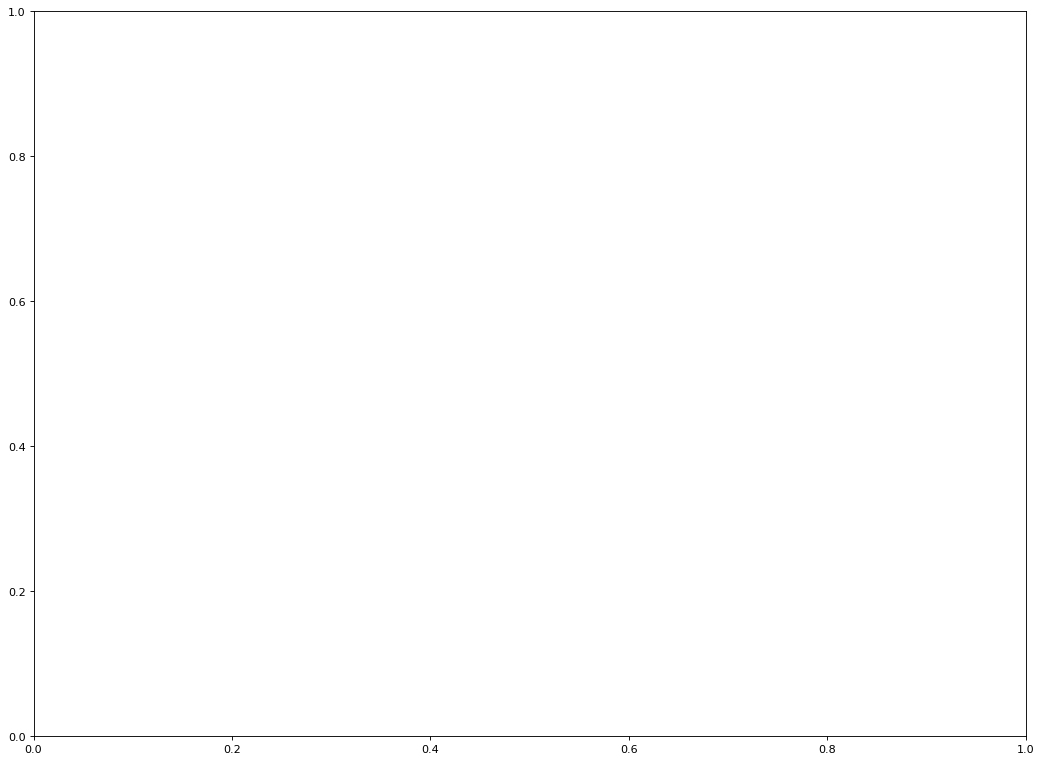

In [23]:
asset_ids = list(range(0,14))
for _id in asset_ids:
    temp_dataframe = X_train.loc[X_train['Asset_ID'] == _id]
    title = "Asset_ID_" + str(_id)
    plt.figure(figsize=(16,12), dpi= 80)
    for i, y in enumerate(X_train.yyyy):
        if i>0:
            plt.plot('month', 'value', data=X_train.loc[X_train.yyyy == y, :], color=mycolors[i], label=y)
            plt.text(X_train.loc[X_train==y, :].shape[0]-.9, X_train.loc[X_train.yyyy==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])
            
            
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()